# Titanic_ML_Project

* *Prelude*:

    The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

    One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


* *About the Project*:

    In this project, we will try to analyze the data of the passengers in the Titanic and try to find out what sorts of people were likely to survive.
    In particular, we will apply the tools of machine learning to predict which passengers survived the tragedy.

### 1. The Imports:
* **Packages Imported** :-

    1. sys: access to system parameters
    2. numpy : for numerical computation
    3. pandas: for data manipulation and analysis
    4. matplotlib: plotting library
    5. seaborn: plotting library based on matplotlib
    6. sklearn: machine learning library

In [233]:
## load packages
import sys
import numpy as np
import pandas as pd
import matplotlib as mtlb
import seaborn as sns
import sklearn as skl

In [234]:
## version of packages used
print(f'Python version: {sys.version}', end='\n\n')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Matplotlib version: {mtlb.__version__}')
print(f'Seaborn version: {sns.__version__}')
print(f'sklearn version: {skl.__version__}')

Python version: 3.6.8 |Anaconda custom (64-bit)| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]

Numpy version: 1.12.0
Pandas version: 0.23.4
Matplotlib version: 3.1.0
Seaborn version: 0.9.0
sklearn version: 0.19.0


In [235]:
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
%matplotlib inline

### model algorithms and model helpers

### 2. The Data:

* **Overview** :

 *The training set* will be used to build our machine learning models. For the training set, we have the outcome (also known as the “ground truth”) for each passenger. Our model will be based on “features” like passengers’ gender and class. And we will also use feature engineering to create new features.

* The data contains following fields:

    * PassengerID: to identify each row.
    * Survived: whether the passanger survived or not.(0=No,1=Yes)
    * Plcass: class of the ticket passenger purchased.(1st class =1, 2nd class =2, 3rd classs= 3)
    * Sex: the passenger's sex.
    * Name: name of the passenger.
    * SibSp: the number of sibling or spouses passenger had aboard the titanic
    * Parch: the number of parents or childern the titianic passenger had aboard the Titanic
    * Ticket: ticket number
    * Fare: fare of the passenger paid
    * Cabin: passenger's cabin number
    * Embarked: the port where the passenger embarked.(C = Cherbourg, Q = Queenstown, S = Southampton)

~ Read the data from train.csv file using pandas's read_csv function.

In [236]:
## titanic_data will store the data from train.csv
titanic_data = pd.read_csv('train.csv')

~ Use basic functions to see the dataset and the information about the dataset

In [237]:
## head() to see first few rows of the dataset
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [184]:
## use info() function
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [185]:
## check for NaN values
titanic_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

* **Summary of Dataframe -- using info() and isna().any() :**

  - There is a total of 891 entries(i.e. 891 row).
  
  - The dataframe contains 12 columns: 2 have float values, 5 have int values and 5 have string values
    
  - Data Columns:
      - PassengerId (int): Unique Identifier, contains no NaN values.
      - Survived (int): Outcome or Dependent Variable, contains 0 or 1; 0 for not survived and 1 for survived; no NaN values.  
      - Pclass (int): Representing Ticket class, 1 = upper class, 2 = middle class, 3 = lower class, no NaN values.
      - Name (string): Names of passengers, no NaN values.
      - Sex (string): Gender of the passenger, no NaN values.
      - Age (float): Age of the passenger, contains NaN values.
      - SibSp (int): Number of related siblings/spouse aboard, no NaN values.
      - Parch (int): Number of related parents/children aboard, no NaN values.
      - Ticket (string): Ticket Numbers, no NaN values.
      - Fare (float): Price of the ticket, no NaN values.
      - Cabin (string): Cabin number of passengers, contains NaN values.
      - Embarked (string): Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton; contains NaN values.

In [186]:
## use describe() method
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* **Summary of Dataframe -- using describe():**
    - PassengerId has unique value fromh 1 to 891.
    - Survived has value either 0 or 1, mean is 0.38 that means we have more data about passengers who did not surived the crash.
    - Pclass has value either 1 or 2 or 3, mean is 2.3 that means we have a lots of people in passenger class 2.
    - Age has NaN values, min age being 0.4 and max being 80, mean is 29.6 that means we have a lot of people having age around 30.
    - SibSp has min value of 0 and max value of 8, mean is 0.52 that means there are lot of people having no siblings or spouse aboard.
    - Parch has min value 0 and max value 6, mean being 0.38 that means there are lot of people have no parents or children aboard.
    - Fare has min value 0 and max value 512.32, mean being 32.20 that means avg ticket price was 32.20

* From the dataset above we can see that we have *SibSp* and *Parch* fields, now what we can do is take these two fields and make a new field named as *Family_Size*. To insert value in the new field we have to sum the values from *SibSp* and *Parch* field and add one to the result, so to give us the family size of that particular person.

In [187]:
## make new column Family_Size 
family_values = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data.insert(loc=6, column='Family_Size', value=family_values)

* Since we have used *SibSp* and *Parch* fields to create *Family_Size* field, so we do not need those two field and now we will drop *SibSp* and *Parch* fields from our dataframe.

In [188]:
## drop the columns
titanic_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

* Dropping *Ticket* field. PASSENGER ID IF NOT USED

In [189]:
## drop Ticket Field
titanic_data.drop('Ticket', axis=1, inplace=True)

In [190]:
## check column names
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'Family_Size', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Find out how many NaN values are there in *Age*, *Cabin* and *Embarked* columns.

In [191]:
## to find number of NaN values
list_values = ['Age', 'Cabin', 'Embarked']
titanic_data[list_values].isna().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

* So from the output above we can see that the *Cabin* field has too much NaN values. Now we will drop the *Cabin* field and try to fill up *Age* and *Embarked* fields.

In [192]:
## drop Cabin field
titanic_data.drop('Cabin', axis=1, inplace=True)

In [193]:
## check the column names
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'Family_Size', 'Fare', 'Embarked'],
      dtype='object')

* So, we hae finally deleted the *Cabin* field. Now let's fillup the *Age* and *Embarked* columns.

* **Filling Up *Age* field**:
    
    To fill up the *Age* field's NaN values we will use *Pclass* field. The *Pclass* field has 3 classes (1,2,3), now what we will do is, we will find median age in all these three classes and then we will fill up the missing values according to the Pclass we encounter while filling up the missing values.

~ To find median age for all *Pclass*

In [194]:
## median age for each class
titanic_data.groupby(by='Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [195]:
## fill up NaN values in Age field
## fill_age: function to fill the null values in Age field

def fill_age(cols):
    pclass = cols[0]
    age = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37.0
        elif pclass == 2:
            return 29.0
        else:
            return 24.0
    else:
        return age

## apply fill_age method to Age column
titanic_data['Age'] = titanic_data[['Pclass', 'Age']].apply(fill_age, axis=1)

* **Filling up *Embarked* Field**:

~ Count total number of occurence for *S, C* and *Q*

In [196]:
## use value_counts() method
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* From here we can see that S (i.e. Southampton) is by far the most embarked port. And since it's value is higher than the rest of the ports, so we will fill up the missing values with S port.

In [197]:
## fill up missing values
titanic_data['Embarked'].fillna(value='S', inplace=True)

* Let's recheck the dataframe: to see whether any NaN values are still there or not.

In [198]:
## check for NaN values
titanic_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
Family_Size    False
Fare           False
Embarked       False
dtype: bool

~ Since all the NaN values are filled up, now we can do ***Exploratory Data Analysis(EDA)***.

### 3. Exploratory Data Analysis(EDA)

* Total number of passengers who survived and those who don't.

0    549
1    342
Name: Survived, dtype: int64


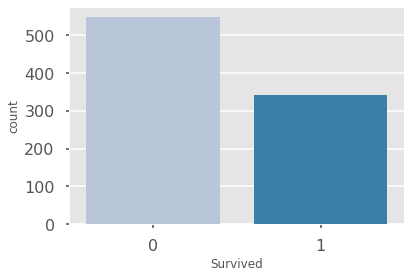

In [199]:
## use value_counts() method
print(titanic_data['Survived'].value_counts())

## visualize the data
## use seaborn's countplot
sns.countplot(x='Survived', data=titanic_data, palette='PuBu')

~ Most passengers(549) did not survived the disaster. Only 342 passengers were able to survive the disaster.

---


* Number of passengers in each *Pclass*.

1    216
2    184
3    491
Name: Pclass, dtype: int64


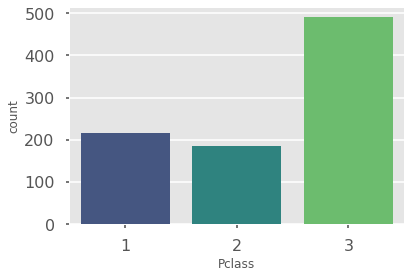

In [200]:
## use value_counts()
print(titanic_data['Pclass'].value_counts().sort_index())

## visualize the data
## use seaborn's countplot
sns.countplot(x='Pclass', data=titanic_data, palette='viridis')

~ There were 216 passengers in *Pclass-1*, 184 passengers in *Pclass-2* and 491 passengers in *Pclass-3*.


---

* Total number of male and female passengers.

male      577
female    314
Name: Sex, dtype: int64


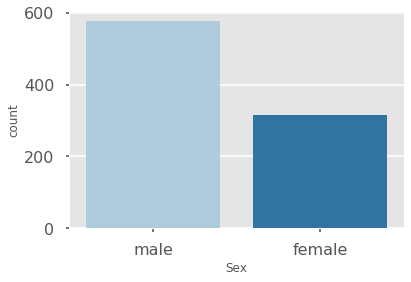

In [201]:
## use value_counts()
print(titanic_data['Sex'].value_counts())

## visualize the data
## use seaborn's countplot
sns.countplot(x='Sex', data=titanic_data, palette='Paired')

~ There were more males(577) then females(314).


---

* Minimum age, Mean age and Maximum age of the passengers. 

In [202]:
## use min(), max(), mean() methods
print(f"Minimum Age: {titanic_data['Age'].min()}")
print(f"Mean Age: {titanic_data['Age'].mean()}")
print(f"Maximum Age: {titanic_data['Age'].max()}")

Minimum Age: 0.42
Mean Age: 29.06640852974186
Maximum Age: 80.0


~ The *minimum age* is of an infant: *5.04 months*, the *average age* of the passengers: *29.066 years* and the *maximum age* of the passenger: *80 years*.


---

* List of family size and total occurence of each family size.

Family Size:
1
2
3
4
5
6
7
8
11

1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: Family_Size, dtype: int64


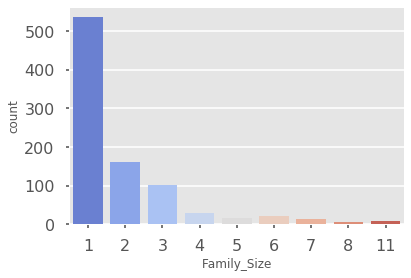

In [203]:
## use unique() method to find family size
print('Family Size:')
for i in sorted(titanic_data['Family_Size'].unique()):
    print(i)
    
print()    
    
## use value_counts() to find occurence of each family size    
print(titanic_data['Family_Size'].value_counts().sort_index())

## visualize the data
## use seaborn's countplot()
sns.countplot(x='Family_Size', data=titanic_data, palette='coolwarm')

~ There are *9 family sizes* in our dataset. Minimum being 1 and maximum being 11.

~ Most of the passengers that were travelling were single(537) and only 7 passengers were there having a family size of 11 members.

---

* Minimum fare, Average fare and Maximum fare.

In [204]:
## use min(), mean(), max() methods
print(f"Minimum Fare: {titanic_data['Fare'].min()}")
print(f"Average Fare: {titanic_data['Fare'].mean()}")
print(f"Maximum Fare: {titanic_data['Fare'].max()}")

Minimum Fare: 0.0
Average Fare: 32.2042079685746
Maximum Fare: 512.3292


---

* Passengers from each Embarked port.

S    646
C    168
Q     77
Name: Embarked, dtype: int64


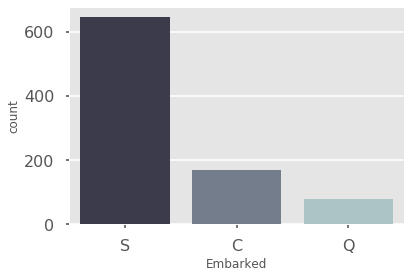

In [205]:
## use value_counts() method
print(titanic_data['Embarked'].value_counts())

## visualize the data
## use seaborn's countplot
sns.countplot(x='Embarked', data=titanic_data, palette='bone')

~ Most of the passengers*(646)* boarded from the *Southampton* port, followed by *168 passengers* from *Cherbourg* port and *77 passengers* from  *Queenstown* port.



---

* Survival count male v/s female

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


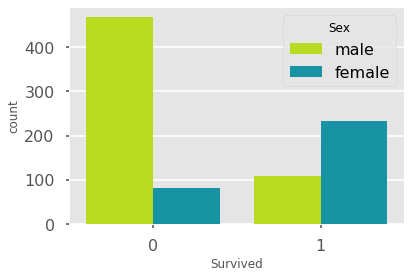

In [206]:
## use groupby() and count() methods
print(titanic_data.groupby(by=['Survived', 'Sex']).count()['PassengerId'])

## visualize the data
## use seaborn's countplot()
sns.countplot(x='Survived', data=titanic_data, hue='Sex', palette='nipy_spectral_r')

~ *81 females* and *468 males* did not survived the disaster, on the other hand, *233 females* and *109 males* survived the disaster.



---

* Survived passengers in each *Pclass*.

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64


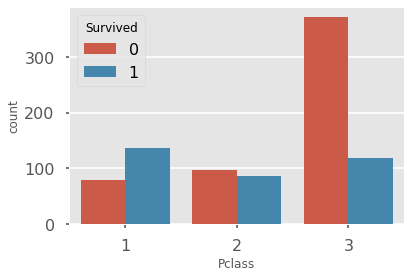

In [207]:
## use groupby() and count() methods
print(titanic_data.groupby(by=['Pclass', 'Survived']).count()['PassengerId'])

## visualize the data
## use seaborn's countplot
sns.countplot(x='Pclass', data=titanic_data, hue='Survived')

~ *Pclass-1*: *80 passengers* did not survived and *136 passengers* survived.

~ *Pclass-2*: *97 passengers* did not survived and *87 passengers* survived.
  
~ *Pclass-3*: *372 passengers* did not survived and *119 passengers* survived.

---

* Minimum age, Average age and Maximum age of the passengers who survived and who don't.

The passengers who survived:
	Minimum Age: 0.42
	Average Age: 28.27388888888889
	Maximum Age: 80.0

The passengers who did not survived:
	Minimum Age: 1.0
	Average Age: 29.560109289617486
	Maximum Age: 74.0



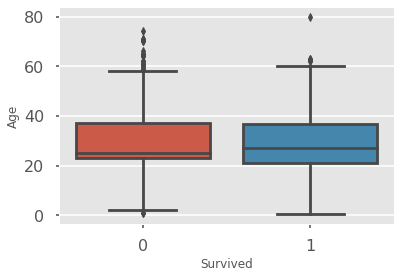

In [219]:
## use min(), mean(), max() methods
print("The passengers who survived:")
print(f"\tMinimum Age: {titanic_data[titanic_data['Survived'] == 1]['Age'].min()}")
print(f"\tAverage Age: {titanic_data[titanic_data['Survived'] == 1]['Age'].mean()}")
print(f"\tMaximum Age: {titanic_data[titanic_data['Survived'] == 1]['Age'].max()}")
      
print()      

print("The passengers who did not survived:")
print(f"\tMinimum Age: {titanic_data[titanic_data['Survived'] == 0]['Age'].min()}")
print(f"\tAverage Age: {titanic_data[titanic_data['Survived'] == 0]['Age'].mean()}")
print(f"\tMaximum Age: {titanic_data[titanic_data['Survived'] == 0]['Age'].max()}")
      
print()      

## visualize the data
## using seaborn's boxplot
titanic_data['Survived'] = titanic_data['Survived'].astype(str)
sns.boxplot(x='Survived',y='Age', data=titanic_data)      
titanic_data['Survived'] = titanic_data['Survived'].astype(int)

---

* Maximum, Average and Minimum fare for both survived and unsurvived passengers.

The passengers who survived:
Maximum Fare: 512.3292
Average Fare: 48.39540760233917
Minimum Fare: 0.0

The passengers who did not survived:
Maximum Fare: 263.0
Average Fare: 22.117886885245877
Minimum Fare: 0.0



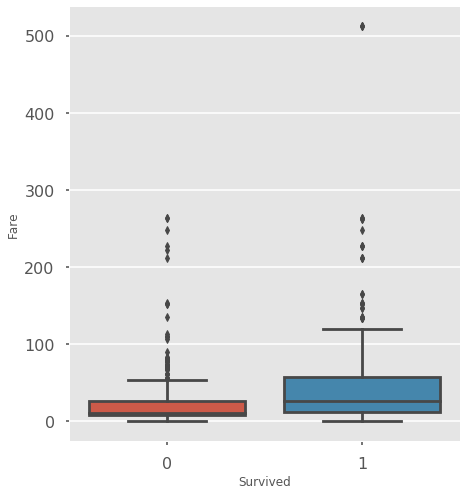

In [224]:
## use max(), mean(), min()

print('The passengers who survived:')
print(f"Maximum Fare: {titanic_data[titanic_data['Survived'] == 1]['Fare'].max()}")
print(f"Average Fare: {titanic_data[titanic_data['Survived'] == 1]['Fare'].mean()}")
print(f"Minimum Fare: {titanic_data[titanic_data['Survived'] == 1]['Fare'].min()}")

print()

print('The passengers who did not survived:')
print(f"Maximum Fare: {titanic_data[titanic_data['Survived'] == 0]['Fare'].max()}")
print(f"Average Fare: {titanic_data[titanic_data['Survived'] == 0]['Fare'].mean()}")
print(f"Minimum Fare: {titanic_data[titanic_data['Survived'] == 0]['Fare'].min()}")
      
print()      
      
## visualize the data
## using seaborn's boxplot
plt.figure(figsize=(7,8))
titanic_data['Survived'] = titanic_data['Survived'].astype(str)
sns.boxplot(x='Survived',y='Fare', data=titanic_data)      
titanic_data['Survived'] = titanic_data['Survived'].astype(int)

---

* Survival count in embarked field.

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: PassengerId, dtype: int64


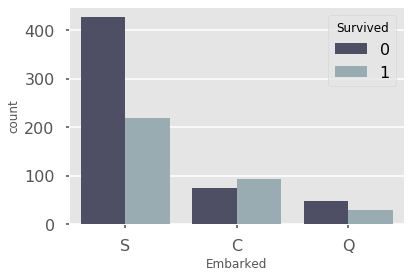

In [137]:
## use groupby() and count() methods
print(titanic_data.groupby(by=['Embarked', 'Survived']).count()['PassengerId'])

## visualize the data
## use seaborn's countplot
sns.countplot(x='Embarked', data=titanic_data, hue='Survived', palette='bone')

~ Since, there were more number of passengers from *S port* so their survival and their death rate is high compared to other ports.

---

* Minimum, Average and Maximum age in each Pclass.

Pclass
1    38.062130
2    29.825163
3    24.824684
Name: Age, dtype: float64


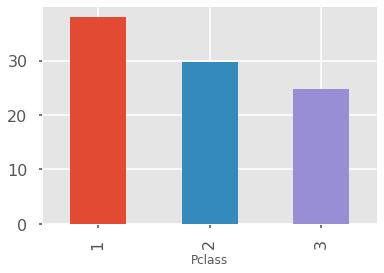

In [138]:
## use groupby() and mean() method
print(titanic_data.groupby(by='Pclass').mean()['Age'])

## visualize the data
## use pandas plot method
titanic_data.groupby(by='Pclass').mean()['Age'].plot(kind='bar')

~ Mean age of : 
 
 *Pclass-1* was *38.06 years*

 *Pclass-2* was *29.82 years*
                 
 *Pclass-3* was *24.82 years*
 

---

* Minimum, Average and Maximum age for each Sex.

For Male:
	Minimum Age: 0.42
	Average Age: 29.83218370883882
	Maximum Age: 80.0

For Female:
	Minimum Age: 0.75
	Average Age: 27.659235668789808
	Maximum Age: 63.0


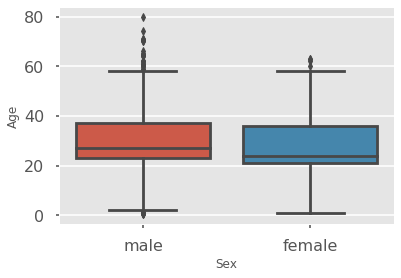

In [225]:
## use min(), mean(), max() methods
print('For Male:')
print(f"\tMinimum Age: {titanic_data[titanic_data['Sex'] == 'male']['Age'].min()}")
print(f"\tAverage Age: {titanic_data[titanic_data['Sex'] == 'male']['Age'].mean()}")
print(f"\tMaximum Age: {titanic_data[titanic_data['Sex'] == 'male']['Age'].max()}")
      
print()      
      
print('For Female:')
print(f"\tMinimum Age: {titanic_data[titanic_data['Sex'] == 'female']['Age'].min()}")
print(f"\tAverage Age: {titanic_data[titanic_data['Sex'] == 'female']['Age'].mean()}")
print(f"\tMaximum Age: {titanic_data[titanic_data['Sex'] == 'female']['Age'].max()}")
      
## visualize the data
## using seaborn's boxplot
sns.boxplot(x='Sex',y='Age', data=titanic_data)      

---

* **Exploring Age field**: Let us divide the age group into five different categories - Child(0 -12 years), Adolescence(13-18 years), Young Adult(19-39 years), Adult(40-59 years) and Senior Adult(60 years and above). And then let's try to find out number of passengers in each groups, their mean ages, their mean fare and survival rates.

In [231]:
## function will return number of passengers, their mean ages, mean fare and survival rate for each age group.
def explore_age(df, start, end, age_group):
    num_pass = len(df[(df['Age'] >= start) & (df['Age'] <= end)])
    mean_age = df[(df['Age'] >= start) & (df['Age'] <= end)]['Age'].mean()
    mean_fare = df[(df['Age'] >= start) & (df['Age'] <= end)]['Fare'].mean()
    
    num_surv = df[(df['Age'] >= start) & (df['Age'] <= end)]['Survived'].value_counts()[1]
    tot_num = df[(df['Age'] >= start) & (df['Age'] <= end)]['Survived'].value_counts().sum()
    
    surv_rate = num_surv / tot_num
    
    print(f'For {age_group}:')
    print(f"\tNumber of Passengers: {num_pass}")
    print(f"\tMean Age: {mean_age}")
    print(f"\tMean Fare: {mean_fare}")
    print(f"\tSurvival Rate: {surv_rate}")
    print()
    
def age_group(cols):
    if cols >= 0.0 and cols <= 12.99:
        return 'Child'
    elif cols >= 13.0 and cols <= 18.99:
        return 'Adolescence'
    elif cols >= 19.0 and cols <= 39.99:
        return 'Young Adult'
    elif cols >= 40.0 and cols <= 59.99:
        return 'Adult'
    else:
        return 'Senior Adult'

explore_age(df=titanic_data, start=0.0, end=12.99, age_group='Child(0.0 - 12.99 years)')
explore_age(df=titanic_data, start=13.0, end=18.99, age_group='Adolescence(13.0 - 18.99 years)')
explore_age(df=titanic_data, start=19.0, end=39.99, age_group='Young Adult(19.0 - 39.99 years)')
explore_age(df=titanic_data, start=40.0, end=59.99, age_group='Adult(40.0 - 59.99 years)')
explore_age(df=titanic_data, start=60.0, end=200.99, age_group='Senior Adult(60.0 years and above)')

For Child(0.0 - 12.99 years):
	Number of Passengers: 69
	Mean Age: 4.770579710144927
	Mean Fare: 31.53635217391305
	Survival Rate: 0.5797101449275363

For Adolescence(13.0 - 18.99 years):
	Number of Passengers: 70
	Mean Age: 16.57857142857143
	Mean Fare: 33.451312857142874
	Survival Rate: 0.42857142857142855

For Young Adult(19.0 - 39.99 years):
	Number of Passengers: 589
	Mean Age: 27.55263157894737
	Mean Fare: 29.47907979626482
	Survival Rate: 0.35823429541595925

For Adult(40.0 - 59.99 years):
	Number of Passengers: 137
	Mean Age: 47.35401459854015
	Mean Fare: 41.48178394160585
	Survival Rate: 0.39416058394160586

For Senior Adult(60.0 years and above):
	Number of Passengers: 26
	Mean Age: 65.09615384615384
	Mean Fare: 43.46795
	Survival Rate: 0.2692307692307692



* Minimum, Average and Maximum age according to the age groups(visualization).

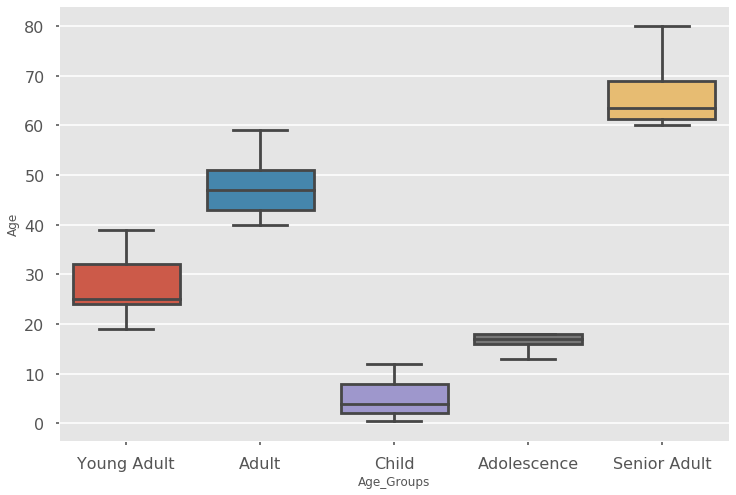

In [232]:
## creating a new field Age_Groups
titanic_data['Age_Groups'] = titanic_data['Age'].apply(age_group)

## use seaborn's boxplot()
plt.figure(figsize=(12,8))
sns.boxplot(x='Age_Groups', y='Age', data=titanic_data)

## drop Age_Groups field
titanic_data.drop('Age_Groups', axis=1, inplace=True)

---

* **Exploring Name Field**: If we look closely to our *Name* field, we will see that each name has a title associated with it (e.g. Mr, Mrs). Let's us try to make a new field *Title* which will store the title of the corresponding names. And then we will find out value count for each title and the survival rate for each title.

In [141]:
## make new column title_values
title_values = titanic_data['Name'].apply(lambda item: item.split('.')[0]).apply(lambda item: item.split(',')[1].strip())
titanic_data.insert(loc=4, column='Name_Title', value=title_values)

* Value count for each name title.

In [157]:
## use value_counts() methods
print(f"\nValue Counts for each name title:\n{titanic_data['Name_Title'].value_counts()}")


Value Counts for each name title:
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Mme               1
Lady              1
Ms                1
Capt              1
Sir               1
Jonkheer          1
the Countess      1
Name: Name_Title, dtype: int64


In [170]:
## function to find the survival rate for each name title
def sur_title(df, x):
    tot_num = len(df[(df['Name_Title'] == x)])
    sur_num = len(df[(df['Name_Title'] == x) & (df['Survived'] == 1)])
    
    print(f'Survival rate for {x} title: {sur_num/tot_num}')

for i in titanic_data['Name_Title'].unique():
    sur_title(df=titanic_data, x=i)

Survival rate for Mr title: 0.15667311411992263
Survival rate for Mrs title: 0.792
Survival rate for Miss title: 0.6978021978021978
Survival rate for Master title: 0.575
Survival rate for Don title: 0.0
Survival rate for Rev title: 0.0
Survival rate for Dr title: 0.42857142857142855
Survival rate for Mme title: 1.0
Survival rate for Ms title: 1.0
Survival rate for Major title: 0.5
Survival rate for Lady title: 1.0
Survival rate for Sir title: 1.0
Survival rate for Mlle title: 1.0
Survival rate for Col title: 0.5
Survival rate for Capt title: 0.0
Survival rate for the Countess title: 1.0
Survival rate for Jonkheer title: 0.0


---

### *Slothfulwave612...*